In [ ]:
# Install gdown to download from Google Drive
!pip install -q gdown

# Download the ZIP file from Google Drive
import gdown
import zipfile
import os

# Google Drive file ID
file_id = "1OvtlaQjfCmoa7Uso2zNpGHoVE_f2i_9g"
zip_output = "dataset.zip"

# Download using gdown
gdown.download(f"https://drive.google.com/uc?id={file_id}", output=zip_output, quiet=False)

# Extract the ZIP file
extract_dir = "dataset"
with zipfile.ZipFile(zip_output, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files
print("Extracted files:")
print(os.listdir(extract_dir))



Downloading...
From (original): https://drive.google.com/uc?id=1OvtlaQjfCmoa7Uso2zNpGHoVE_f2i_9g
From (redirected): https://drive.google.com/uc?id=1OvtlaQjfCmoa7Uso2zNpGHoVE_f2i_9g&confirm=t&uuid=9666d935-6dd3-423c-87b7-aa147daca2c9
To: /content/dataset.zip
100%|██████████| 761M/761M [00:13<00:00, 57.2MB/s]


Extracted files:
['releasev1-detection&tracking']


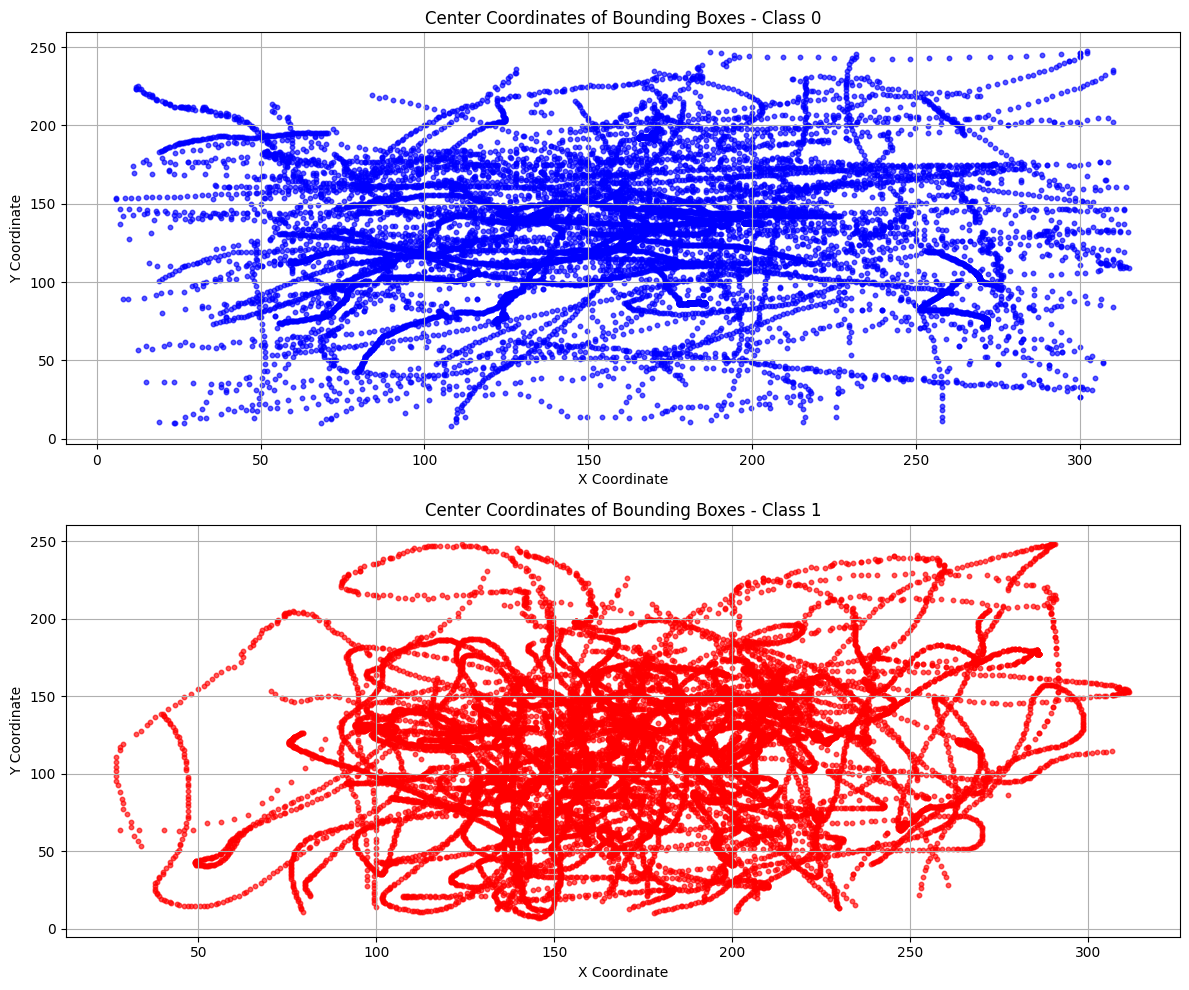

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Paths
base_path = "/content/dataset/releasev1-detection&tracking"
rgb_img_path = os.path.join(base_path, "RGB/images")
rgb_lbl_path = os.path.join(base_path, "RGB/labels")

# Get image filenames
rgb_images = sorted([f for f in os.listdir(rgb_img_path) if f.endswith(('.jpg', '.png'))])

# Function to draw bounding boxes and get center coordinates
def draw_yolo_labels(image_path, label_path):
    img = Image.open(image_path).convert("RGB")
    w, h = img.size

    coords_x = []
    coords_y = []
    classes = []

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5:
                    continue
                cls, x_c, y_c, bw, bh = map(float, parts)

                # Convert normalized coords to pixel coords
                x0 = (x_c - bw / 2) * w
                y0 = (y_c - bh / 2) * h
                x1 = (x_c + bw / 2) * w
                y1 = (y_c + bh / 2) * h

                # Get center point in pixels
                center_x = (x0 + x1) / 2
                center_y = (y0 + y1) / 2

                coords_x.append(center_x)
                coords_y.append(center_y)
                classes.append(int(cls))

    return coords_x, coords_y, classes

# Initialize lists to store all coordinates per class
all_coords_x0 = []
all_coords_y0 = []
all_coords_x1 = []
all_coords_y1 = []

# Process all images
for img_file_name in rgb_images:
    img_file = os.path.join(rgb_img_path, img_file_name)
    lbl_file = os.path.join(rgb_lbl_path, os.path.splitext(img_file_name)[0] + ".txt")

    coords_x, coords_y, classes = draw_yolo_labels(img_file, lbl_file)

    for x, y, cls in zip(coords_x, coords_y, classes):
        if cls == 0:
            all_coords_x0.append(x)
            all_coords_y0.append(y)
        elif cls == 1:
            all_coords_x1.append(x)
            all_coords_y1.append(y)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Plot for Class 0
plt.subplot(2, 1, 1)
plt.scatter(all_coords_x0, all_coords_y0, c='blue', alpha=0.4, s=10)
plt.title('Center Coordinates of Bounding Boxes - Class 0')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)

# Plot for Class 1
plt.subplot(2, 1, 2)
plt.scatter(all_coords_x1, all_coords_y1, c='red', alpha=0.4, s=10)
plt.title('Center Coordinates of Bounding Boxes - Class 1')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)

plt.tight_layout()
plt.show()



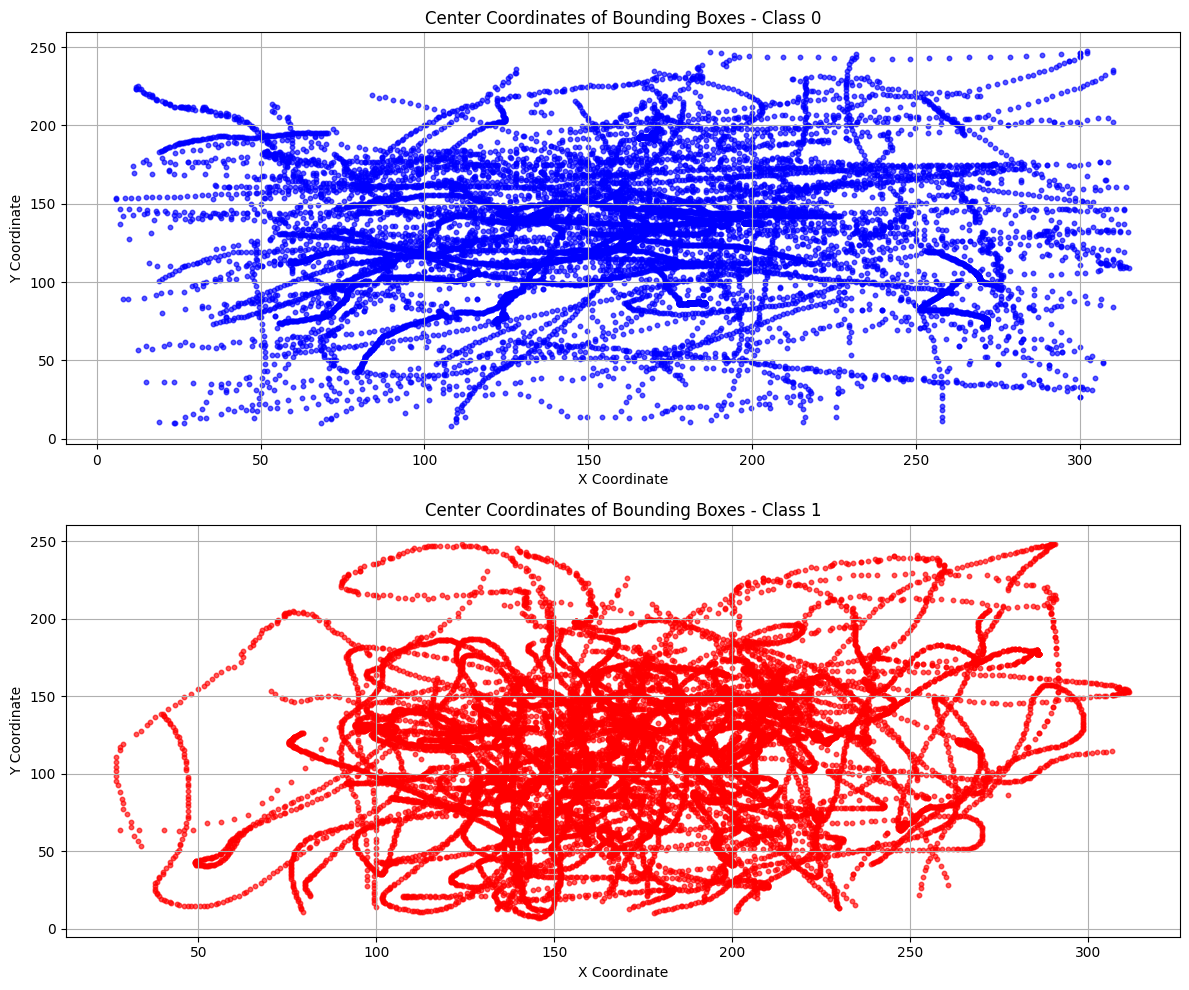

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

# Paths
base_path = "/content/dataset/releasev1-detection&tracking"
ir_img_path = os.path.join(base_path, "IR/images")
ir_lbl_path = os.path.join(base_path, "IR/labels")

# Get image filenames
rgb_images = sorted([f for f in os.listdir(rgb_img_path) if f.endswith(('.jpg', '.png'))])

# Function to draw bounding boxes and get center coordinates
def draw_yolo_labels(image_path, label_path):
    img = Image.open(image_path).convert("RGB")
    w, h = img.size

    coords_x = []
    coords_y = []
    classes = []

    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) != 5:
                    continue
                cls, x_c, y_c, bw, bh = map(float, parts)

                # Convert normalized coords to pixel coords
                x0 = (x_c - bw / 2) * w
                y0 = (y_c - bh / 2) * h
                x1 = (x_c + bw / 2) * w
                y1 = (y_c + bh / 2) * h

                # Get center point in pixels
                center_x = (x0 + x1) / 2
                center_y = (y0 + y1) / 2

                coords_x.append(center_x)
                coords_y.append(center_y)
                classes.append(int(cls))

    return coords_x, coords_y, classes

# Initialize lists to store all coordinates per class
all_coords_x0 = []
all_coords_y0 = []
all_coords_x1 = []
all_coords_y1 = []

# Process all images
for img_file_name in rgb_images:
    img_file = os.path.join(rgb_img_path, img_file_name)
    lbl_file = os.path.join(rgb_lbl_path, os.path.splitext(img_file_name)[0] + ".txt")

    coords_x, coords_y, classes = draw_yolo_labels(img_file, lbl_file)

    for x, y, cls in zip(coords_x, coords_y, classes):
        if cls == 0:
            all_coords_x0.append(x)
            all_coords_y0.append(y)
        elif cls == 1:
            all_coords_x1.append(x)
            all_coords_y1.append(y)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Plot for Class 0
plt.subplot(2, 1, 1)
plt.scatter(all_coords_x0, all_coords_y0, c='blue', alpha=0.4, s=10)
plt.title('Center Coordinates of Bounding Boxes - Class 0')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)

# Plot for Class 1
plt.subplot(2, 1, 2)
plt.scatter(all_coords_x1, all_coords_y1, c='red', alpha=0.4, s=10)
plt.title('Center Coordinates of Bounding Boxes - Class 1')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(True)

plt.tight_layout()
plt.show()

